In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

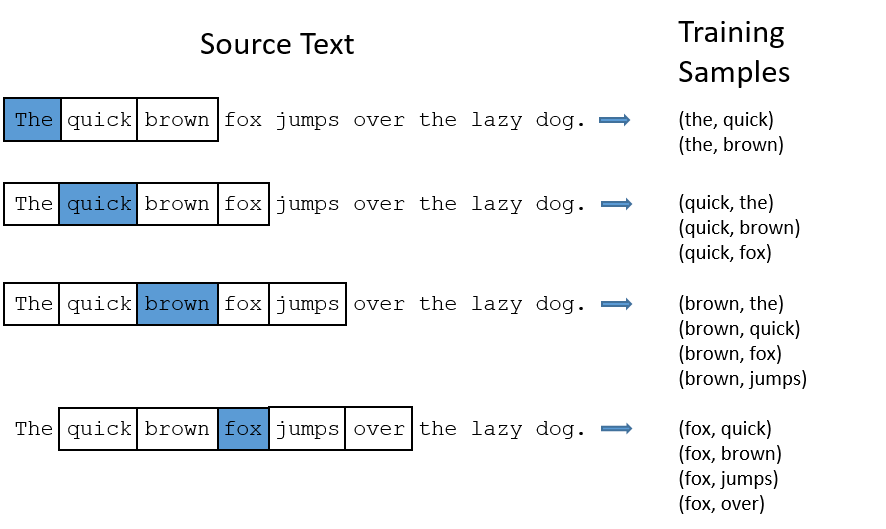

In [3]:
# convert to lower case
print('Original : ',corpus_raw)
corpus_raw = corpus_raw.lower()
print('After lowering : ',corpus_raw)

Original :  He is the king . The king is royal . She is the royal  queen 
After lowering :  he is the king . the king is royal . she is the royal  queen 


In [4]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
        
words

['he',
 'is',
 'the',
 'king',
 'the',
 'king',
 'is',
 'royal',
 'she',
 'is',
 'the',
 'royal',
 'queen']

In [5]:
words = set(words) # so that all duplicate words are removed

words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

In [6]:
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [7]:
word2int

{'the': 0, 'is': 1, 'he': 2, 'queen': 3, 'king': 4, 'she': 5, 'royal': 6}

In [8]:
int2word

{0: 'the', 1: 'is', 2: 'he', 3: 'queen', 4: 'king', 5: 'she', 6: 'royal'}

In [9]:
# raw sentences is a list of sentences.
print(corpus_raw)
raw_sentences = corpus_raw.split('.')
print(raw_sentences)
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

he is the king . the king is royal . she is the royal  queen 
['he is the king ', ' the king is royal ', ' she is the royal  queen ']


In [10]:
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [11]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)



In [12]:
data
# [i/p,o/p] format

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [13]:
x_train

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [14]:
y_train

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow as tf
# from keras.optimizers import SGD ,Adam

In [16]:
vocab_size

7

In [17]:
# Reducing dimension from 7 to 5

EMBEDDING_DIM=5

model1 = tf.keras.models.Sequential([
    

  
  
  tf.keras.layers.Dense(EMBEDDING_DIM,name="dense1",activation="relu",input_shape=(vocab_size,)),
  tf.keras.layers.Dense(vocab_size,name="dense2",activation="softmax"),
 
  
  
])

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 5)                 40        
_________________________________________________________________
dense2 (Dense)               (None, 7)                 42        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [19]:
opt=tf.keras.optimizers.Adam()
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model1.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 5ms/step - loss: 2.1059 - accuracy: 0.0882
Epoch 2/1000
2/2 [==============================] - 0s 9ms/step - loss: 2.1020 - accuracy: 0.1176
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.0987 - accuracy: 0.1176
Epoch 4/1000
2/2 [==============================] - 0s 6ms/step - loss: 2.0955 - accuracy: 0.1176
Epoch 5/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.0927 - accuracy: 0.1176
Epoch 6/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.0899 - accuracy: 0.1176
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 2.0870 - accuracy: 0.1176
Epoch 8/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.0845 - accuracy: 0.1176
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 2.0815 - accuracy: 0.1176
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.0788 - accuracy: 0.1176
Epoch 11/1000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 1.8826 - accuracy: 0.3235
Epoch 164/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.8819 - accuracy: 0.3235
Epoch 165/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.8812 - accuracy: 0.3235
Epoch 166/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.8805 - accuracy: 0.3235
Epoch 167/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.8799 - accuracy: 0.3235
Epoch 168/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.8791 - accuracy: 0.3235
Epoch 169/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8785 - accuracy: 0.3235
Epoch 170/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.8779 - accuracy: 0.3235
Epoch 171/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.8772 - accuracy: 0.3235
Epoch 172/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.8766 - accuracy: 0.3235
Epoch 173/1000

2/2 [==============================] - 0s 7ms/step - loss: 1.7908 - accuracy: 0.3529
Epoch 326/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7903 - accuracy: 0.3529
Epoch 327/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7899 - accuracy: 0.3529
Epoch 328/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7894 - accuracy: 0.3529
Epoch 329/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7890 - accuracy: 0.3529
Epoch 330/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7886 - accuracy: 0.3529
Epoch 331/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7882 - accuracy: 0.3529
Epoch 332/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7877 - accuracy: 0.3529
Epoch 333/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.7873 - accuracy: 0.3529
Epoch 334/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7868 - accuracy: 0.3529
Epoch 335/1000


2/2 [==============================] - 0s 5ms/step - loss: 1.7391 - accuracy: 0.3529
Epoch 488/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7388 - accuracy: 0.3529
Epoch 489/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.7386 - accuracy: 0.3529
Epoch 490/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.7384 - accuracy: 0.3529
Epoch 491/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7381 - accuracy: 0.3529
Epoch 492/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7379 - accuracy: 0.3529
Epoch 493/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.7377 - accuracy: 0.3529
Epoch 494/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7374 - accuracy: 0.3529
Epoch 495/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7371 - accuracy: 0.3529
Epoch 496/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.7368 - accuracy: 0.3529
Epoch 497/1000


2/2 [==============================] - 0s 6ms/step - loss: 1.6985 - accuracy: 0.3824
Epoch 650/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.6983 - accuracy: 0.3824
Epoch 651/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.6980 - accuracy: 0.3824
Epoch 652/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.6978 - accuracy: 0.3824
Epoch 653/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.6975 - accuracy: 0.3824
Epoch 654/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.6973 - accuracy: 0.3824
Epoch 655/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6970 - accuracy: 0.3824
Epoch 656/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.6967 - accuracy: 0.3824
Epoch 657/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.6965 - accuracy: 0.3824
Epoch 658/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6962 - accuracy: 0.3824
Epoch 659/1000


2/2 [==============================] - 0s 5ms/step - loss: 1.6660 - accuracy: 0.3824
Epoch 813/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6659 - accuracy: 0.3824
Epoch 814/1000
2/2 [==============================] - 0s 9ms/step - loss: 1.6657 - accuracy: 0.3824
Epoch 815/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.6657 - accuracy: 0.3824
Epoch 816/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.6657 - accuracy: 0.3824
Epoch 817/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.6656 - accuracy: 0.3824
Epoch 818/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.6656 - accuracy: 0.3824
Epoch 819/1000
2/2 [==============================] - 0s 10ms/step - loss: 1.6655 - accuracy: 0.3824
Epoch 820/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6655 - accuracy: 0.3824
Epoch 821/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.6654 - accuracy: 0.3824
Epoch 822/1000

2/2 [==============================] - 0s 4ms/step - loss: 1.6548 - accuracy: 0.3824
Epoch 895/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.6545 - accuracy: 0.3824
Epoch 896/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.6543 - accuracy: 0.3824
Epoch 897/1000
2/2 [==============================] - 0s 4ms/step - loss: 1.6540 - accuracy: 0.3824
Epoch 898/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6539 - accuracy: 0.3824
Epoch 899/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6536 - accuracy: 0.3824
Epoch 900/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.6536 - accuracy: 0.3824
Epoch 901/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6534 - accuracy: 0.3824
Epoch 902/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6532 - accuracy: 0.3824
Epoch 903/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.6530 - accuracy: 0.3824
Epoch 904/1000


2/2 [==============================] - 0s 5ms/step - loss: 1.6405 - accuracy: 0.3824
Epoch 977/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.6404 - accuracy: 0.3824
Epoch 978/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.6402 - accuracy: 0.3824
Epoch 979/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.6400 - accuracy: 0.3824
Epoch 980/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.6399 - accuracy: 0.3824
Epoch 981/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.6398 - accuracy: 0.3824
Epoch 982/1000
2/2 [==============================] - 0s 8ms/step - loss: 1.6396 - accuracy: 0.3824
Epoch 983/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.6395 - accuracy: 0.3824
Epoch 984/1000
2/2 [==============================] - 0s 6ms/step - loss: 1.6393 - accuracy: 0.3824
Epoch 985/1000
2/2 [==============================] - 0s 7ms/step - loss: 1.6391 - accuracy: 0.3824
Epoch 986/1000


In [21]:
# dimension is reduced to 5, o/p having 5 dimensions

model1.weights[0]+model1.weights[1]

<tf.Tensor: shape=(7, 5), dtype=float32, numpy=
array([[ 0.6774116 , -0.50715053,  0.51173925, -0.61026573, -0.00962821],
       [-0.0023737 , -0.11062299,  1.0573257 , -0.5863395 ,  1.1879954 ],
       [ 0.69598794, -0.0085243 ,  0.22996911, -0.00913852,  0.20362146],
       [-0.00799029, -0.3975873 , -0.0032817 , -0.40468296,  0.9086202 ],
       [-0.16132613, -0.17327425, -0.51287556, -0.04519865,  0.17013317],
       [ 0.6505448 , -0.53114545,  0.02570134, -0.5304849 ,  0.56942904],
       [-0.551585  , -0.34214038, -0.00373714, -0.6512933 , -0.27124614]],
      dtype=float32)>

In [22]:
vectors =(model1.weights[0]+model1.weights[1]).numpy()

In [23]:
vectors

array([[ 0.6774116 , -0.50715053,  0.51173925, -0.61026573, -0.00962821],
       [-0.0023737 , -0.11062299,  1.0573257 , -0.5863395 ,  1.1879954 ],
       [ 0.69598794, -0.0085243 ,  0.22996911, -0.00913852,  0.20362146],
       [-0.00799029, -0.3975873 , -0.0032817 , -0.40468296,  0.9086202 ],
       [-0.16132613, -0.17327425, -0.51287556, -0.04519865,  0.17013317],
       [ 0.6505448 , -0.53114545,  0.02570134, -0.5304849 ,  0.56942904],
       [-0.551585  , -0.34214038, -0.00373714, -0.6512933 , -0.27124614]],
      dtype=float32)

In [24]:
words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

In [25]:
# Reducing dimension further to 2 from 5, using TSNE which is similar to PCA.
# PCA uses linear method to reduce dimension, TSNE uses non-linear method to reduce dimension.

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index


from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)
# o/p having only 2 dimensions


[[-0.44168463  0.89717036]
 [-0.9681673   0.25030422]
 [ 0.27932444  0.96019673]
 [ 0.86206335  0.5068005 ]
 [-0.42587128 -0.9047838 ]
 [ 0.17900556  0.9838481 ]
 [ 0.91525096 -0.4028841 ]]


In [26]:
words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

the 0.89717036
is 0.25030422
he 0.96019673
queen 0.5068005
king -0.9047838
she 0.9838481
royal -0.4028841


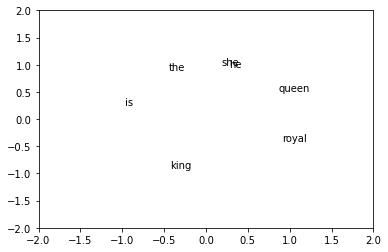

In [27]:
plt.xlim(-2,+2)
plt.ylim(-2,+2)


for word in words:
    print(word, vectors[word2int[word]][1])
    plt.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
